<a href="https://colab.research.google.com/github/sumanthgm-a4/Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K MEANS CLUSTERING**

## **Data Preprocessing**

Importing the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [17]:
dataset = pd.read_csv("Mall_Customers.csv")

#Dropping the CustomerID column for obvious reasons
#Drpping the Genre and Age columns for better visualization of the results
X = dataset.iloc[:, [3, 4]].values

Splitting the data into Train and Test sets is not done

## **Actual Model**

Using the elbow method to find the optimal number of clusters

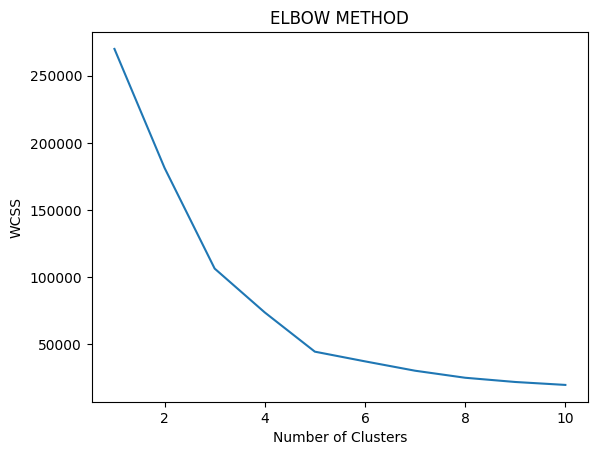

In [18]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Fitting the K-Means model on the dataset

In [19]:
#No. of optimal clusters is 5 from the above graph
#Dependent variable will have 5 values i.e. 0, 1, 2, 3, 4 (5 different groups of customers)

kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42, n_init = 10)

#To build the dependent variable (y_kmeans, with 5 different values)
y_kmeans = kmeans.fit_predict(X)

In [20]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Visualizing the clusters

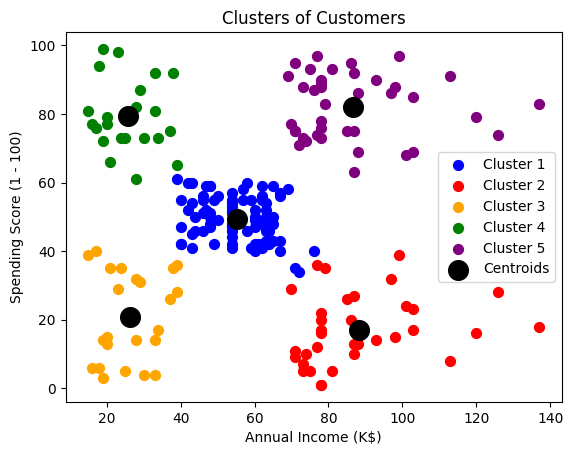

In [37]:
#Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = "blue", label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = "red", label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = "orange", label = "Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = "green", label = "Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = "purple", label = "Cluster 5")

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = "black", label = "Centroids")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1 - 100)")
plt.legend()
plt.show()